In [1]:
import os
import numpy as np

from ztlearn.utils import *
from ztlearn.dl.models import Sequential
from ztlearn.optimizers import register_opt
from ztlearn.datasets.digits import fetch_digits
from ztlearn.dl.layers import LSTM, Dense, Flatten

/home/jefkine/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


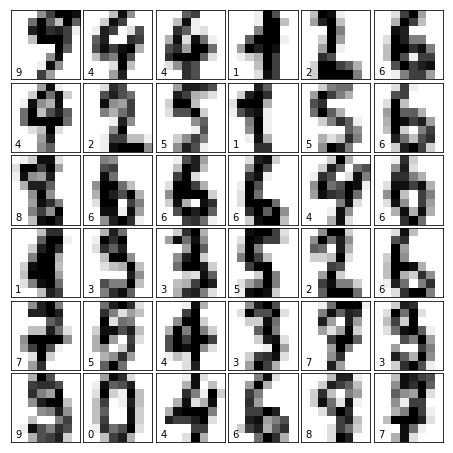

In [2]:
data = fetch_digits(custom_path = os.getcwd() + '/..')
train_data, test_data, train_label, test_label = train_test_split(data.data,
                                                                  data.target,
                                                                  test_size   = 0.3,
                                                                  random_seed = 15)

# plot samples of training data
plot_img_samples(train_data, train_label)

In [3]:
# optimizer definition
opt = register_opt(optimizer_name = 'adam', momentum = 0.01, learning_rate = 0.001)

# Model definition
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape = (8, 8)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax')) # 10 digits classes
model.compile(loss = 'categorical_crossentropy', optimizer = opt)

model.summary('digits lstm')


 DIGITS LSTM

 Input Shape: (8, 8)
+---------------------+--------+--------------+
¦ LAYER TYPE          ¦ PARAMS ¦ OUTPUT SHAPE ¦ 
+---------------------+--------+--------------+
¦ LSTM                ¦ 71,176 ¦       (8, 8) ¦ 
¦ Activation: TANH    ¦      0 ¦       (8, 8) ¦ 
¦ Flatten             ¦      0 ¦        (64,) ¦ 
¦ Dense               ¦    650 ¦        (10,) ¦ 
+---------------------+--------+--------------+

 TOTAL PARAMETERS: 71,826



In [4]:
model_epochs = 100
fit_stats = model.fit(train_data.reshape(-1, 8, 8),
                      one_hot(train_label),
                      batch_size      = 128,
                      epochs          = model_epochs,
                      validation_data = (test_data.reshape(-1, 8, 8), one_hot(test_label)),
                      shuffle_data    = True)


START: Tue, 12 Feb 2019 23:53:37

Computing: [#############################################] 100% 

FINISH: Tue, 12 Feb 2019 23:55:14

TIMER: fit operation took: 0:01:37 (h:mm:ss) to complete.



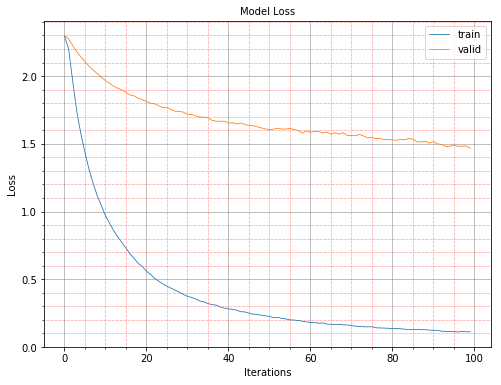

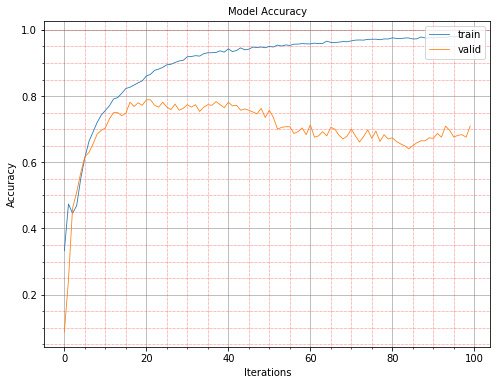

In [5]:
model_name   = model.model_name
plot_metric('loss', model_epochs, fit_stats['train_loss'], fit_stats['valid_loss'], model_name = model_name)
plot_metric('accuracy', model_epochs, fit_stats['train_acc'], fit_stats['valid_acc'], model_name = model_name)